In [2]:
#Hidden Layer 적용하여 XOR 해결
#이번주에 할 코드의 기본
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

learning_rate = 0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#레이어 시작
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')    #입력, 출력 2개
b1 = tf.Variable(tf.random_normal([2]), name='bias1')    #거기에 대한 바이어스도 2개
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)    #W1, b1를 이용하여 출력 2개가 나오도록 하는 레이어
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')    #입력 2개, 출력 1개
b2 = tf.Variable(tf.random_normal([1]), name='bias2')    #바이어스 1개
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)    #W2, b2를 이용하여 출력 1개가 나오도록 하는 레이어
#여기까지가 그래프를 그리는 레이어다

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)#경사하강법

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W2))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: \n", h, "\nCorrect:\n", c, "\nAccuracy:\n", a)

0 0.7315512 [[-1.011666 ]
 [ 0.6350718]]
500 0.66300535 [[-1.1473188]
 [ 1.1247213]]
1000 0.56061697 [[-2.0536354]
 [ 2.0469878]]
1500 0.32521626 [[-3.5266666]
 [ 3.792276 ]]
2000 0.17022364 [[-4.8581185]
 [ 5.315607 ]]
2500 0.10421395 [[-5.801907 ]
 [ 6.3321996]]
3000 0.07250708 [[-6.4866633]
 [ 7.0461955]]
3500 0.054764487 [[-7.012731 ]
 [ 7.5854626]]
4000 0.04366482 [[-7.436047]
 [ 8.015194]]
4500 0.036148988 [[-7.788624]
 [ 8.370952]]
5000 0.030757422 [[-8.08996 ]
 [ 8.673785]]
5500 0.026717525 [[-8.352656]
 [ 8.93704 ]]
6000 0.023586107 [[-8.585255]
 [ 9.169668]]
6500 0.021092607 [[-8.793803]
 [ 9.37792 ]]
7000 0.019062959 [[-8.982712]
 [ 9.566344]]
7500 0.017380564 [[-9.155304]
 [ 9.73834 ]]
8000 0.015964437 [[-9.314123]
 [ 9.896498]]
8500 0.014756865 [[-9.461177]
 [10.042854]]
9000 0.013715377 [[-9.598066 ]
 [10.1790285]]
9500 0.012808429 [[-9.726086]
 [10.306336]]
10000 0.012011716 [[-9.846307]
 [10.425842]]

Hypothesis: 
 [[0.01166028]
 [0.9844632 ]
 [0.98930585]
 [0.00985867]

In [3]:
#위의 코드에서 노드 2개를 5개로 바꾼것
#정밀도가 늘어남
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

learning_rate = 0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#레이어 시작
#위의 코드보다 노드가 늘어나 정밀도가 높아졌다
W1 = tf.Variable(tf.random_normal([2, 5]), name='weight1')    #2->5
b1 = tf.Variable(tf.random_normal([5]), name='bias1')    #2->5
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
W2 = tf.Variable(tf.random_normal([5, 1]), name='weight2')    #2->5
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
#여기까지가 그래프를 그리는 레이어다

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W2))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: \n", h, "\nCorrect:\n", c, "\nAccuracy:\n", a)

0 0.7107358 [[ 1.0141189 ]
 [ 0.14687352]
 [-0.39922827]
 [-0.6600192 ]
 [-1.2039195 ]]
500 0.6710736 [[ 0.90017956]
 [ 0.08459909]
 [-0.49944744]
 [-0.8319839 ]
 [-1.5542929 ]]
1000 0.60293823 [[ 1.1010678 ]
 [ 0.12409084]
 [-0.389468  ]
 [-0.9928593 ]
 [-2.5272856 ]]
1500 0.4848765 [[ 1.7760755 ]
 [ 0.16069998]
 [-0.06264772]
 [-1.3638319 ]
 [-3.8867874 ]]
2000 0.33722085 [[ 2.935657  ]
 [ 0.23893684]
 [ 0.28278115]
 [-1.9486325 ]
 [-5.243668  ]]
2500 0.20530204 [[ 4.1981997]
 [ 0.408971 ]
 [ 0.4710893]
 [-2.498897 ]
 [-6.4339037]]
3000 0.12541045 [[ 5.231383  ]
 [ 0.6262167 ]
 [ 0.54609954]
 [-2.896868  ]
 [-7.3378816 ]]
3500 0.083014324 [[ 6.001606  ]
 [ 0.8324172 ]
 [ 0.57770246]
 [-3.1872108 ]
 [-7.9925547 ]]
4000 0.059493147 [[ 6.580947  ]
 [ 1.0128691 ]
 [ 0.59338206]
 [-3.4121792 ]
 [-8.480573  ]]
4500 0.045311898 [[ 7.031803 ]
 [ 1.1696688]
 [ 0.6021838]
 [-3.5946171]
 [-8.860666 ]]
5000 0.036090225 [[ 7.3946624]
 [ 1.3073424]
 [ 0.6075323]
 [-3.7474756]
 [-9.168227 ]]
5500 0

In [4]:
#위의 코드에서 히든 레이어를 3개로 늘리기(노드는 5개)
#정밀도가 늘어나지는 않음
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

learning_rate = 0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#레이어 시작
W1 = tf.Variable(tf.random_normal([2, 5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
#===========================추가코드========================
W2 = tf.Variable(tf.random_normal([5, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
#============================================================
W4 = tf.Variable(tf.random_normal([5, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)
#여기까지가 그래프를 그리는 레이어다

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W2))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: \n", h, "\nCorrect:\n", c, "\nAccuracy:\n", a)

0 0.69570804 [[-1.2672719  -1.4244449   0.4453939   2.255021    1.3681967 ]
 [ 2.040617    1.2754596  -0.28644198  0.36494327 -1.2758965 ]
 [ 1.7917694   0.92977893  1.7656289   0.5455362  -0.36813128]
 [ 0.08228423  0.30296504  0.65930617  0.46669954  0.48469266]
 [-0.16923563 -0.86291474 -0.3715926   0.5440967  -1.6672229 ]]
500 0.6930888 [[-1.280101   -1.4297738   0.44497058  2.258312    1.3743409 ]
 [ 2.0355098   1.275094   -0.28590238  0.3220848  -1.2742167 ]
 [ 1.7905244   0.92410994  1.765182    0.5371784  -0.36494166]
 [ 0.09233348  0.299146    0.6585174   0.47132742  0.48391473]
 [-0.16588618 -0.87027    -0.37134147  0.5465289  -1.6647562 ]]
1000 0.69256127 [[-1.2975112  -1.443355    0.44433823  2.2649803   1.3851122 ]
 [ 2.029908    1.2745821  -0.28466853  0.2818512  -1.2718648 ]
 [ 1.7878783   0.9172258   1.7653432   0.52709615 -0.36029398]
 [ 0.10313032  0.29888716  0.658343    0.47127607  0.48206067]
 [-0.16397303 -0.87714696 -0.37023854  0.5445488  -1.6612607 ]]
1500 0.69

Epoch: 0 
Hypothesis:
 [[0.68079114]
 [0.6829269 ]
 [0.68030196]
 [0.6824511 ]] 
Accuracy:
 0.5 


Epoch: 1000 
Hypothesis:
 [[0.49911243]
 [0.5012911 ]
 [0.4986962 ]
 [0.50082004]] 
Accuracy:
 0.5 


Epoch: 2000 
Hypothesis:
 [[0.49912333]
 [0.50129676]
 [0.49871334]
 [0.5007935 ]] 
Accuracy:
 0.5 


Epoch: 3000 
Hypothesis:
 [[0.49912518]
 [0.5013166 ]
 [0.49871755]
 [0.50077415]] 
Accuracy:
 0.5 


Epoch: 4000 
Hypothesis:
 [[0.49911785]
 [0.5013525 ]
 [0.49870828]
 [0.5007615 ]] 
Accuracy:
 0.5 


Epoch: 5000 
Hypothesis:
 [[0.49910057]
 [0.5014069 ]
 [0.49868423]
 [0.5007553 ]] 
Accuracy:
 0.5 


Epoch: 6000 
Hypothesis:
 [[0.49907172]
 [0.5014833 ]
 [0.49864295]
 [0.50075483]] 
Accuracy:
 0.5 


Epoch: 7000 
Hypothesis:
 [[0.49902922]
 [0.50158757]
 [0.4985812 ]
 [0.5007602 ]] 
Accuracy:
 0.5 


Epoch: 8000 
Hypothesis:
 [[0.49897003]
 [0.5017284 ]
 [0.49849397]
 [0.5007715 ]] 
Accuracy:
 0.5 


Epoch: 9000 
Hypothesis:
 [[0.49888834]
 [0.5019185 ]
 [0.4983727 ]
 [0.50078833]] 
A

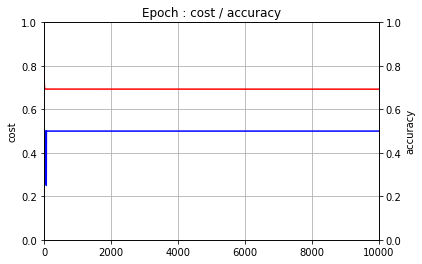

In [5]:
#레이어 4개일 때 cost와 accuracy 비교
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
epoch_arr = []
cost_arr = []
accuracy_arr = []
step_val = 10000

def graph():
    import matplotlib as mpl
    mpl.rc('axes', unicode_minus=False)    #음수부호 설정
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()    #x축을 공유하는 두개의 y축
    ax0.set_title("Epoch : cost / accuracy")
    ax0.plot(cost_arr, 'r-', label='cost')
    ax0.set_ylabel('cost')
    ax0.axis([0, step_val, 0, 1])
    ax0.grid(True)
    
    ax1.plot(accuracy_arr, 'b', label='accuracy')
    ax1.set_ylabel('accuracy')
    ax1.grid(False)
    ax1.set_xlabel('epochs')
    ax1.axis([0, step_val, 0, 1])
    plt.show()
    
learning_rate = 0.1
tf.set_random_seed(0)
np.random.seed(0)

x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#레이어 시작
W1 = tf.Variable(tf.random_normal([2, 5]), name='weight1')
b1 = tf.Variable(tf.random_normal([5]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([5, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)


W4 = tf.Variable(tf.random_normal([5, 5]), name='weight4')
b4 = tf.Variable(tf.random_normal([5]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

#레이어가 많아지면 기울기 소실 문제가 발생하여 오히려 오차가 커진다
W5 = tf.Variable(tf.random_normal([5, 5]), name='weight5')
b5 = tf.Variable(tf.random_normal([5]), name='bias5')
layer5 = tf.sigmoid(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([5, 1]), name='weight6')
b6 = tf.Variable(tf.random_normal([1]), name='bias7')
hypothesis = tf.sigmoid(tf.matmul(layer5, W6) + b6)
#여기까지가 그래프를 그리는 레이어다

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(step_val):
        _, h, p, a, c = sess.run([train, hypothesis, predicted, accuracy, cost], feed_dict={X:x_data, Y:y_data})
        
        epoch_arr.append(step)
        cost_arr.append(c)
        accuracy_arr.append(a)
        
        if step % (step_val/10) == 0:
            print("Epoch:", step, "\nHypothesis:\n", h, "\nAccuracy:\n", a, "\n\n")
        h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
        
    print("\nHypothesis: \n", h, "\nCorrect:\n", c, "\nAccuracy:\n", a)
    
graph()

In [7]:
#기울기 소실 문제와 활성화 함수(ReLU)
#ReLU함수 : 시그모이드 함수의 대안으로 현재 가장 많이 사용\
#위에선 히든 레이어가 5개이면 결과가 오히려 부정확해졌으나
#ReLU를 쓰면 더 정확하게 할 수 있다
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

learning_rate = 0.01
tf.set_random_seed(0)
np.random.seed(0)

x_data = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_data = [[0], [1], [1], [0]]

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

#레이어 시작
W1 = tf.Variable(tf.random_normal([2, 5]), name='weight1')
b1 = tf.Variable(tf.zeros([5]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)  #시그모이드 함수 대신에 ReLU함수 사용

W2 = tf.Variable(tf.random_normal([5, 5]), name='weight2')
b2 = tf.Variable(tf.random_normal([5]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b3 = tf.Variable(tf.random_normal([5]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b4 = tf.Variable(tf.random_normal([5]), name='bias3')
layer4 = tf.nn.relu(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([5, 5]), name='weight3')
b5 = tf.Variable(tf.random_normal([5]), name='bias3')
layer5 = tf.nn.relu(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([5, 1]), name='weight4')
b6 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer5, W6) + b6)    #맨 끝에는 relu가 아니라 sigmoid써야 된다
#여기까지가 그래프를 그리는 레이어다

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data, Y:y_data})
        if step % 1000 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: \n", h, "\nCorrect:\n", c, "\nAccuracy:\n", a)

0 0.9906736
1000 0.0058720596
2000 0.0020654462
3000 0.0011754337
4000 0.00079587527
5000 0.00059150445
6000 0.00046679156
7000 0.00038547852
8000 0.00032861758
9000 0.00028597188
10000 0.00025270766

Hypothesis: 
 [[7.4186921e-04]
 [9.9996912e-01]
 [9.9982101e-01]
 [5.8829417e-05]] 
Correct:
 [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
 1.0
